# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# считывание csv файла и запись данных в датафрейм
df = pd.read_csv('telecom_users.csv')
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [3]:
# удалим столбец 'Unnamed: 0', так как он не указана в описании данных к заданию, кроме того нет информации о том, что он содержит
df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
df['customerID'].unique().shape # проверка, что все строки содержат уникальных пользователей
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 


Датасет содержит 21 столбец и 5986 сторок, то есть информацию о 5986 пользователях.  
Столбцы датасета содержат числовые и категориальные признаки, столбец 'Churn' - целевая переменная. Столбец 'customerID 'не несет информации, необходимой для построения модели оттока клиентов, далее рассматриваться не будет.  
Для удобства создадим списки для названий столбцов числовых и категориальных призников

In [5]:
# Категориальные признаки
categorical_col = df.columns
categorical_col.to_numpy()
categorical_col = list(np.delete(categorical_col, [0, 5, 18, 19, 20]))
# Числовые признаки
numerical_col = ['tenure', 'MonthlyCharges', 'TotalCharges']
# Целевая переменная
target_col = ['Churn']
print('Категориальные данные: \n', categorical_col)
print('Числовые данные: \n', numerical_col)
print('Целевая переменная: \n', target_col)

Категориальные данные: 
 ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Числовые данные: 
 ['tenure', 'MonthlyCharges', 'TotalCharges']
Целевая переменная: 
 ['Churn']


Анализ датасета показал, что колонка 'TotalCharges' содержит данные типа string, с которыми не работает большинство классификаторов. Кроме того, эта колонка содержит "пустые" строки (заполненные пробелом).  Решение стоит ли заполнять пустые строки примем после более детального анализа этих строк относительно целевой переменной. Построим гистограмму распределения целевой переменной.  

<AxesSubplot:xlabel='Churn', ylabel='Count'>

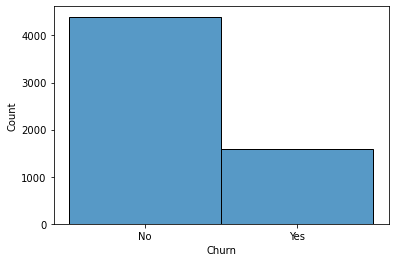

In [6]:
sns.histplot(df['Churn'])

In [7]:
churn_no = df['Churn'][df['Churn']=='No'].count()
churn_yes = df['Churn'][df['Churn']=='Yes'].count()
print('Общее число клиентов: ', df['Churn'].shape[0])
print('Число клиентов, оставшихся в  компании: ', churn_no)
print('Число клиентов, покинувших компанию: ', churn_yes)
print('Соотношение клиентов, оставшихся и компании и покинувших её: ', churn_no / churn_yes)

Общее число клиентов:  5986
Число клиентов, оставшихся в  компании:  4399
Число клиентов, покинувших компанию:  1587
Соотношение клиентов, оставшихся и компании и покинувших её:  2.7718966603654693


In [8]:
df[numerical_col + target_col][df['TotalCharges'] == ' ']

,tenure,MonthlyCharges,TotalCharges,Churn
356,0,61.90,,No
634,0,56.05,,No
2771,0,25.35,,No
3086,0,19.70,,No
3255,0,19.85,,No
4326,0,80.85,,No
5375,0,20.25,,No
5382,0,20.00,,No
5695,0,52.55,,No
5951,0,25.75,,No


In [9]:
print("Количество пустых строк: ", df[numerical_col + target_col][df['TotalCharges'] == ' '].shape[0])

Количество пустых строк:  10


Анализ целевой переменной показал, что соотношение оставшихся в компании и покинувших её несбалансировано и имеет место перевес в сторону оставшихся в компании клиентов почти в три раза, то есть объекты интересующего нас класса "Churn" = "Yes" в меньшинстве, но такой перевес не является серьезным.  
Пустым строкам соответвуют объекты с  "Churn" = "No", пришедшие в компанию менее месяца назад. Эти клиенты не относятся к интересующему нас классу, а также их количество менее 0.2% от всех записей датасета. По этим причинам можем удалить пустые строки, а остальные данные столбца 'TotalCharges' преобразуем к типу float.

In [10]:
def total_charges_transform(charges_df):
    if charges_df == " ":
        return None
    else:
        return float(charges_df)

In [11]:
df['TotalCharges'] = df['TotalCharges'].apply(total_charges_transform)

In [12]:
df.dropna(axis=0, inplace=True)

Основные метрики числовых признаков

In [13]:
df[numerical_col].describe()

,tenure,MonthlyCharges,TotalCharges
count,5976.000000,5976.000000,5976.000000
mean,32.523092,64.846687,2298.060617
std,24.500858,30.107576,2274.127165
min,1.000000,18.250000,18.800000
25%,9.000000,35.750000,404.312500
50%,29.000000,70.425000,1412.150000
75%,56.000000,89.900000,3846.962500
max,72.000000,118.750000,8684.800000


# 2. Исследование зависимостей и формулирование гипотез

Построим распределения числовых данных совместно с распределением целевой переменноЙ.

<AxesSubplot:xlabel='tenure', ylabel='Count'>

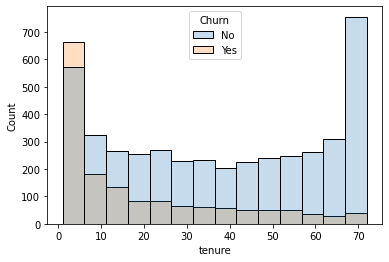

In [14]:
sns.histplot(df, x='tenure', hue='Churn', alpha=0.25)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

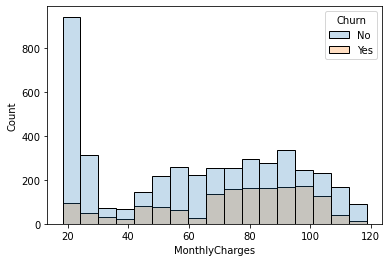

In [15]:
sns.histplot(df, x='MonthlyCharges', hue='Churn', alpha=0.25)

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

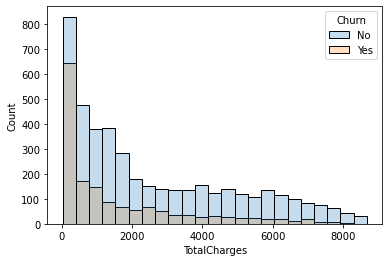

In [16]:
sns.histplot(df, x='TotalCharges', hue='Churn', alpha=0.25)

Из построенных выше гистограмм можно сделать вывод о том, что числовые признаки имеют связь с целевой переменной, в особенности 'tenure' и 'TotalCharges', где наблюдается высокий отток клиентов при малых значениях соответствующих призников. Наиболее выражено прослеживается взаимосвязь между целевой переменной и признаком 'tenure'. Количественные оценки взаимосвязи будут рассчитаны ниже.

Распределения категориальных данных относительно целевой переменной.

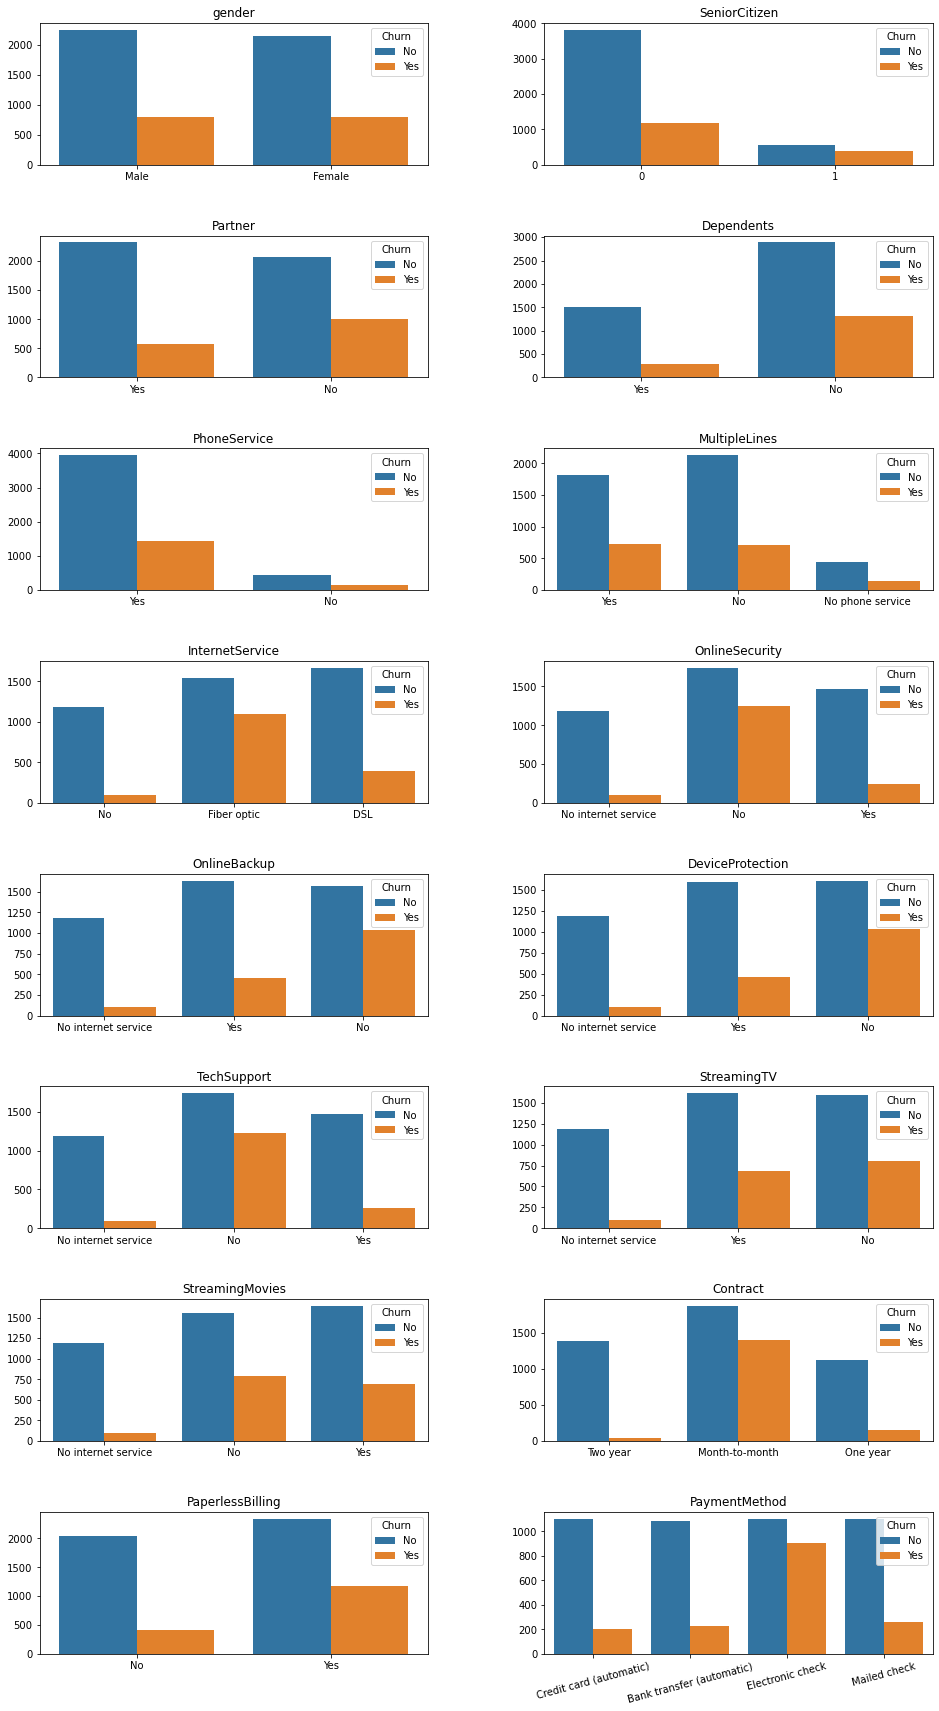

In [17]:
fig, axs = plt.subplots(figsize=(16, 30), ncols=2, nrows=8, gridspec_kw={'wspace': 0.3,'hspace': 0.5 })

for column, ax in zip(categorical_col, axs.flat):
    sns.countplot(x=column, hue='Churn', data=df, ax=ax).set_title(column)
    plt.setp(axs, xlabel=None, ylabel=None)
plt.setp(ax.get_xticklabels(), rotation=15)

plt.show()

Из построенных выше гистограмм видно, что зависимость оттока клиентов от значения категориального признака наиболее выражено проявляется для InternetService, DeviceProtection, TechSupport, Contract и PaymentMethod. Количественная оценка взаимосвязи между целевой переменнной и категориальными признаками будет приведена ниже.

Преобразуем столбец, содержащий целевую переменную в числовое представление данных: значение "Yes" изменим на 1, "No" - на 0

In [18]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [19]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,0
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,0
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,1
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,0
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,0


Так как большинство методов машинного обучения не работают с категориальными данными, перед исследованием зависимостей преобразуем эти данные в числовое представление. Поскольку датасет содержит относительно немного признаков, а сами категориальные признаки имеют не более четырех значений, будем использовать one-hot-encoding, который можно реализовать с помощью метода get_dummies().

In [20]:
df_dummies = pd.get_dummies(df[numerical_col + categorical_col + target_col])

В результате применения one-hot-encoding, было получено 45 признаков. Для построения качественной модели машинного обучения следует исключить признаки, имеющие слабую взаимосвязь с целевой переменной.

Для получения количественной оценки взаимосвязи признаков с целевой переменной построим корреляционную матрицу.

In [21]:
corr_m = df_dummies.corr()

Для удобства рассмотрим столбец 'Churn' корреляционной матрицы, так как именно с ним исследуется взаимосвязь остальных столбцов датасета. Поскольку при построении модели машинного обучения нас интересует как прямая, так и обратная зависимость целевой переменной от признаков, рассмотрим модули коэффициентов корреляции. Отсортируем полученые значения в порядке убывания и рассмотрим признаки, коэффициент корреляции которых с целевой переменной более 0.1.

In [22]:
abs(corr_m['Churn']).sort_values(ascending=False)[1:][abs(corr_m['Churn']) > 0.1].reset_index()

,index,Churn
0,Contract_Month-to-month,0.403332
1,tenure,0.350420
2,OnlineSecurity_No,0.341085
3,TechSupport_No,0.330572
4,Contract_Two year,0.301171
5,InternetService_Fiber optic,0.300297
6,PaymentMethod_Electronic check,0.296304
7,OnlineBackup_No,0.264757
8,DeviceProtection_No,0.251938
9,InternetService_No,0.223416


Как видно из полученной выше таблицы, 6 признаков, имеют умеренную корреляционную связь с целевой переменной по шкале Чеддока, 27 признаков - слабую. Значения корреляционных коэффициентов подтвердили ранее выдвинутые предположения о взаимосвязи признаков tenure, TotalCharges а также  InternetService, DeviceProtection, TechSupport, Contract и PaymentMethod. Между оставшимися двенадцатью признаками и целевой пременной, в соответствии с рассматриваемой шкалой, взаимосвязь ничтожно мала. Предположительно, эти признаки будут исключены из рассмотрения при построении модели. Какие признаки будут отобраны для построения модели будет решено далее с помощью градиентного бустинга. 

Для прогнозирования оттокаклиентов необходимо решить задачу бинарной классификации. Для этого будем использовать распространенные алгоритмы классификации: метод ближайших соседей, наивный Баессовский классификатор, дерево решений, логистическую регрессию, а также методы, представляющие собой ансамбли алгоритмов: случайный лес и градиентный бустинг (xgBoost).

# 3. Построение моделей для прогнозирования оттока

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, recall_score, precision_score, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

Сначала проведем обучение всех выбранных алгоритмов на всех признаках, полученнных в результате применения get_dummies. Обучение будет осуществляться посредством поиска по сетке параметров с помощью метода GridSedrch. Далее с помощью методов градиентного бустинга (XGBClassifier) и случайного леса (RandomForestClassifier) будет произведен отбор наиболее значимых признаков, на которых снова будут обучены выбранные алгоритмы. После этого будет принято решение на каком наборе признаков будет построена наилучшая модель. Качество полученных моделей будет оцениваться на основе метрики auc-roc, отражающей вероятность правильного предсказания класса. 

Разобьем датасет на тренировочную и тестовую выборки. Для удобства создадим список названий столбцов с новыми признаки (после применения get_dummies)

In [165]:
features_dum = list(df_dummies.columns) #список названий столбцов с dummies-признаками
features_dum.remove('Churn')

Для удобства напишем функцию предобработки данных, которая будет разбивать данные на тренировочную и тестовую выборки и осуществлять стандартизацию с помощью StandardScaler.

In [166]:
"""
На вход функции подаются признаки и целевая переменная в виде массива numpy. 
Функция фозвращает тренировочную и тестовую выборки признаков 
и целевой переменной, прошедшие стандартизацию
"""

def preprocess(features, target):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, stratify = target, random_state=17)
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    return x_train, x_test, y_train, y_test

In [167]:
features = df_dummies[features_dum].values
target = df_dummies[target_col].values.reshape(-1)
data_all_dummies = preprocess(features, target) # данные для обучения на всех dummies-признаках

In [168]:
# экземпляры классификаторов
knc = KNeighborsClassifier() 
gnb = GaussianNB()
dtc = DecisionTreeClassifier(random_state=17)
lr = LogisticRegression(max_iter=300, random_state=17)
rfc = RandomForestClassifier(random_state=17) 
xgb = XGBClassifier(random_state=17, eval_metric='logloss')

In [28]:
"""
Функция принимает словарь из классификаторов и их названий classifier, параметр scoring, определяющий какую метрику будет 
максимизировать поиск по сетке, а также список train_test_data, содержащий треноровочную и тестовую выборки признаков и 
целевой переменной.
Возвращает датафрейм, содержащий метрики качества обученных моделей, и словарь, где ключами являются названия алгоритмов, 
а значениями - модели с наилучшими гиперпараметрами.
"""
def grid_search(classifiers, scoring, train_test_data): # 'roc_auc'
    metrics = {}  # словарь для записи метрик
    best_estimators = {}
    for cl, val in classifiers.items(): # итерация по классификаторапм и их названиям
        cl_name = val[0]
        params = val[1]
        x_train, x_test, y_train, y_test = train_test_data[0], train_test_data[1], train_test_data[2], train_test_data[3]
        cl_grid_search = GridSearchCV(estimator=cl, param_grid=params, scoring=scoring, n_jobs=10, cv=10, verbose=True)
        cl_grid_search.fit(x_train, y_train)
        pred = cl_grid_search.predict(x_test) # предсказание
        acc = accuracy_score(y_test, pred)
        pr = precision_score(y_test, pred)
        rec = recall_score(y_test, pred)
        f1 = f1_score(y_test, pred)
        
        pred_prob = cl_grid_search.predict_proba(x_test)[:, 1]
        auc = roc_auc_score(y_test, pred_prob)
        #auc = roc_auc_score(y_test, pred)
        metrics[cl_name] = [acc, pr, rec, f1, auc] # Запись списка метрик в словарь по названию алгоритма
        best_estimators[cl_name] = cl_grid_search.best_estimator_

        # преобразхование метрик в датафрейм
        df_metrics = pd.DataFrame(metrics)   
        df_metrics.index = ['accuracy', 'precision', 'recall', 'f1_score', 'auc_roc']
        
    return [df_metrics, best_estimators]

In [29]:
# словарь классификаторов и их названий для дальнейшего применения в функции grid_searchs 
classifiers = {knc: ['KNeighborsClassifier'], gnb: ['GaussianNB'], dtc: ['DecisionTreeClassifier'], lr: ['LogisticRegression'],
               rfc: ['RandomForestClassifier'], xgb: ['XGBClassifier']}

На основе отношения количества классов "0" и "1", зададим веса в сетке параметров алгоритмов, где это возможно.

In [169]:
neg_pos = df['Churn'][df['Churn'] == 0].count() / df['Churn'][df['Churn'] == 1].count()
print('neg/pos: %.2f' % neg_pos)

neg/pos: 2.77


In [170]:
# список с параметрами классификаторов в соответствии с их порядком в списке "classifiers"
parameters = [
    # параметры для KNeighborsClassifier
    {
        'n_neighbors': range (2, 30),
        'weights': ['uniform', 'distance']
    },
    # параметры для GaussianNB
    {
        'var_smoothing': np.logspace(0,-9, num=50)
    },
    # параметры для DecisionTreeClassifier
    {
        'max_depth': range (2, 10, 1),
        'max_features': ['auto', 'sqrt', 'log2'],
        'class_weight': [{0:1, 1:neg_pos}, {0:1, 1:neg_pos/2}, {0:1, 1:1}]
    },
    # параметры для LogisticRegression
    {
        'penalty': ['l1','l2', 'elasticnet'], 
        'C': np.logspace(-3,3,20), 
        'class_weight': [{0:1, 1:neg_pos}, {0:1, 1:neg_pos/2}, {0:1, 1:1}]
    },
    # параметры для RandomForestClassifier
    {
        'max_depth': range (2, 10, 1),
        'n_estimators': range (20, 220, 20),
        #'max_features': ['auto', 'sqrt', 'log2'],
        'class_weight': [{0:1, 1:neg_pos}, {0:1, 1:neg_pos/2}, {0:1, 1:1}]
    },
    # параметры для XGBClassifier
    {
        'max_depth': range (2, 10, 1), 
        'n_estimators': range(20, 220, 20),
        'scale_pos_weight': [neg_pos, neg_pos/2, 1]
    }
]

In [171]:
# запишем параметры для поиска по сетке в словарь classifiers
for n, val in enumerate(classifiers.values()):
    val.append(parameters[n])

## Расчет метрик всех алгоритмов с помощью поиска по сетке на всех признаках, scoring='roc_auc'

In [172]:
gs_all_dum_feat = grid_search(classifiers, 'roc_auc', data_all_dummies)

Fitting 10 folds for each of 56 candidates, totalling 560 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    4.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    9.8s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   20.0s
[Parallel(n_jobs=10)]: Done 560 out of 560 | elapsed:   25.3s finished


Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 700 tasks      | elapsed:    1.1s
[Parallel(n_jobs=10)]: Done 720 out of 720 | elapsed:    1.2s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 1675 tasks      | elapsed:    5.1s
[Parallel(n_jobs=10)]: Done 1800 out of 1800 | elapsed:    5.5s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 230 tasks      | elapsed:   12.5s
[Parallel(n_jobs=10)]: Done 480 tasks      | elapsed:   30.7s
[Parallel(n_jobs=10)]: Done 830 tasks      | elapsed:   58.5s
[Parallel(n_jobs=10)]: Done 1280 tasks      | elapsed:  1.5min
[Parallel(n_jobs=10)]: Done 1830 tasks      | elapsed:  2.1min
[Parallel(n_jobs=10)]: Done 2400 out of 2400 | elapsed:  2.9min finished


Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    1.7s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   11.9s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   37.1s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:  1.4min
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:  2.9min
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:  5.3min
[Parallel(n_jobs=10)]: Done 2400 out of 2400 | elapsed:  8.8min finished
D:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Проанализируем важность признаков с помощью XGBClassifier  

In [174]:
xgb = gs_all_dum_feat[1]['XGBClassifier']
features_xgb = pd.Series(xgb.feature_importances_, index=features_dum).sort_values(ascending=False)
features_xgb[features_xgb != 0] # отберем признаки, значимость которых не равна нулю

Contract_Month-to-month           0.437666
InternetService_Fiber optic       0.108666
TechSupport_No                    0.076728
OnlineSecurity_No                 0.073667
tenure                            0.056043
PaymentMethod_Electronic check    0.053031
Contract_Two year                 0.045353
StreamingTV_Yes                   0.026683
StreamingMovies_Yes               0.021697
InternetService_No                0.020118
MonthlyCharges                    0.018836
PaperlessBilling_No               0.014309
MultipleLines_No                  0.013362
OnlineBackup_No                   0.012958
TotalCharges                      0.009520
InternetService_DSL               0.005754
Contract_One year                 0.005610
dtype: float32

In [175]:
print('Количество отобранных признаков:', features_xgb[features_xgb != 0].shape[0])

Количество отобранных признаков: 17


In [176]:
features_xgb = list(features_xgb[features_xgb != 0].index) # Запишем признаки в список

Отобрав признаки с помощью градиентного бустинга, обучим на них те же алгоритмы посредством поиска по сетке, предварительно осуществив предобработку данных.

In [178]:
features = df_dummies[features_xgb].values
target = df_dummies[target_col].values.reshape(-1)
data_xgb = preprocess(features, target)

In [179]:
gs_imp_xgb = grid_search(classifiers, 'roc_auc', data_xgb)

Fitting 10 folds for each of 56 candidates, totalling 560 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 541 out of 560 | elapsed:    5.4s remaining:    0.1s
[Parallel(n_jobs=10)]: Done 560 out of 560 | elapsed:    5.5s finished


Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.0s


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=10)]: Done 685 tasks      | elapsed:    0.9s
[Parallel(n_jobs=10)]: Done 701 out of 720 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=10)]: Done 720 out of 720 | elapsed:    0.9s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 1590 tasks      | elapsed:    2.8s
[Parallel(n_jobs=10)]: Done 1800 out of 1800 | elapsed:    3.2s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    1.7s
[Parallel(n_jobs=10)]: Done 220 tasks      | elapsed:   13.2s
[Parallel(n_jobs=10)]: Done 470 tasks      | elapsed:   34.5s
[Parallel(n_jobs=10)]: Done 820 tasks      | elapsed:  1.1min
[Parallel(n_jobs=10)]: Done 1270 tasks      | elapsed:  1.6min
[Parallel(n_jobs=10)]: Done 1820 tasks      | elapsed:  2.2min
[Parallel(n_jobs=10)]: Done 2400 out of 2400 | elapsed:  3.0min finished


Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.8s
[Parallel(n_jobs=10)]: Done 270 tasks      | elapsed:   15.0s
[Parallel(n_jobs=10)]: Done 520 tasks      | elapsed:   32.0s
[Parallel(n_jobs=10)]: Done 870 tasks      | elapsed:  1.1min
[Parallel(n_jobs=10)]: Done 1320 tasks      | elapsed:  2.0min
[Parallel(n_jobs=10)]: Done 1870 tasks      | elapsed:  3.6min
[Parallel(n_jobs=10)]: Done 2400 out of 2400 | elapsed:  5.7min finished
D:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Далее проведем отбор признаков с помощью RandomForestClassifier

In [180]:
rfc = gs_all_dum_feat[1]['RandomForestClassifier']
features_rfc = pd.Series(rfc.feature_importances_, index=features_dum).sort_values(ascending=False)
features_rfc[features_rfc > 0.01] # выведем признаки со значениями больше 0.01

Contract_Month-to-month           0.133951
tenure                            0.128527
TotalCharges                      0.111378
OnlineSecurity_No                 0.074274
MonthlyCharges                    0.065201
InternetService_Fiber optic       0.064198
TechSupport_No                    0.056255
PaymentMethod_Electronic check    0.047199
Contract_Two year                 0.036982
InternetService_DSL               0.024104
OnlineSecurity_Yes                0.021684
DeviceProtection_No               0.019299
TechSupport_Yes                   0.017447
OnlineBackup_No                   0.016578
Contract_One year                 0.016304
dtype: float64

In [181]:
print('Количество отобранных признаков:', features_rfc[features_rfc > 0.01].shape[0])

Количество отобранных признаков: 15


In [182]:
features_rfc = list(features_rfc[features_rfc > 0.01].index) # Запишем признаки в список

Обучим модели на данных, отобранных с помощью RandomForestClassifier

In [183]:
features = df_dummies[features_rfc].values
target = df_dummies[target_col].values.reshape(-1)
data_rfc = preprocess(features, target)

In [184]:
gs_imp_rfc = grid_search(classifiers, 'roc_auc', data_rfc)

Fitting 10 folds for each of 56 candidates, totalling 560 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 560 out of 560 | elapsed:    4.3s finished


Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 481 out of 500 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=10)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.0s


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=10)]: Done 685 tasks      | elapsed:    0.9s
[Parallel(n_jobs=10)]: Done 701 out of 720 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=10)]: Done 720 out of 720 | elapsed:    0.9s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.0s


Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=10)]: Done 1560 tasks      | elapsed:    2.1s
[Parallel(n_jobs=10)]: Done 1800 out of 1800 | elapsed:    2.3s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    1.3s
[Parallel(n_jobs=10)]: Done 230 tasks      | elapsed:   11.7s
[Parallel(n_jobs=10)]: Done 480 tasks      | elapsed:   27.7s
[Parallel(n_jobs=10)]: Done 830 tasks      | elapsed:   52.8s
[Parallel(n_jobs=10)]: Done 1280 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 1830 tasks      | elapsed:  1.9min
[Parallel(n_jobs=10)]: Done 2400 out of 2400 | elapsed:  2.6min finished


Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.8s
[Parallel(n_jobs=10)]: Done 260 tasks      | elapsed:   14.3s
[Parallel(n_jobs=10)]: Done 510 tasks      | elapsed:   30.8s
[Parallel(n_jobs=10)]: Done 860 tasks      | elapsed:  1.1min
[Parallel(n_jobs=10)]: Done 1310 tasks      | elapsed:  2.2min
[Parallel(n_jobs=10)]: Done 1860 tasks      | elapsed:  3.9min
[Parallel(n_jobs=10)]: Done 2400 out of 2400 | elapsed:  6.0min finished
D:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


### Метрики моделей, обученных на всех признаках

In [186]:
gs_all_dum_feat[0]

,KNeighborsClassifier,GaussianNB,DecisionTreeClassifier,LogisticRegression,RandomForestClassifier,XGBClassifier
accuracy,0.784471,0.668005,0.784471,0.789826,0.803213,0.803213
precision,0.598425,0.437736,0.611276,0.598575,0.680702,0.676976
recall,0.574307,0.876574,0.518892,0.634761,0.488665,0.496222
f1_score,0.586118,0.583893,0.561308,0.616137,0.568915,0.572674
auc_roc,0.816038,0.819218,0.820929,0.842332,0.846449,0.850283


### Метрики моделей, обученных на признаках, отобранных с помощью XGBoostClassifier

In [187]:
gs_imp_xgb[0]

,KNeighborsClassifier,GaussianNB,DecisionTreeClassifier,LogisticRegression,RandomForestClassifier,XGBClassifier
accuracy,0.793173,0.731593,0.779116,0.800535,0.755689,0.803213
precision,0.625714,0.496923,0.574610,0.651376,0.526059,0.676976
recall,0.551637,0.813602,0.649874,0.536524,0.813602,0.496222
f1_score,0.586345,0.617001,0.609929,0.588398,0.638971,0.572674
auc_roc,0.835599,0.834261,0.836572,0.842332,0.848917,0.850283


### Метрики моделей, обученных на признаках, отобранных с помощью RandomForestClassifier

In [188]:
gs_imp_rfc[0]

,KNeighborsClassifier,GaussianNB,DecisionTreeClassifier,LogisticRegression,RandomForestClassifier,XGBClassifier
accuracy,0.797189,0.742972,0.794511,0.795850,0.805890,0.802544
precision,0.646875,0.510815,0.627119,0.604545,0.686411,0.626238
recall,0.521411,0.773300,0.559194,0.670025,0.496222,0.637280
f1_score,0.577406,0.615230,0.591212,0.635603,0.576023,0.631710
auc_roc,0.825823,0.826820,0.818525,0.840760,0.844945,0.849889


Из приведенных выше таблиц видно, что относительно метрики auc-roc наилучшие результаты показывают модели, обученные на данных, отобранных с помощью XGBClassifier, что нельзя сказать о моделях, обученных на данных, отобранных с помощью RandomForestClassifier : метрика auc-roc улучшилась только для KNeighborsClassifier и GaussianNB, для остальных моделей эта метрика стала хуже по сравнению с моделями, обученными на всех признаках). Отметим, что также проводилось обучение моделей на большем количестве признаков, отобранных с помощью RandomForestClassifier, однако метрики auc-roc получились еще хуже, чем в приведенной выше таблице.  
Если рассматривать модели, обученные на признаках, отобранных алгоритмом XGBClassifier (features_xgb), то наилучшее значение демонстрирует как раз XGBClassifier и оно остается неизменным и для нового набора признаков, и для исходного. Тем не менее, выберем как наилучшую именно модель XGBClassifier, обученную на признаках features_xgb по той причине, что на меньшем наборе признаков затрачивается меньше времени на обучение и нет смысла использовать признаки с нулевой значимостью.

Отметим, что из двеннадцати признаков, которые предполагалось исключить из рассмотрения на основе корреляционных коэффициентов, было исключено девять из них.

In [189]:
corr_0_1 = abs(corr_m['Churn']).sort_values(ascending=False)[1:][abs(corr_m['Churn']) < 0.1]
features_xgb0 = pd.Series(xgb.feature_importances_, index=features_dum).sort_values(ascending=False)
features_xgb0 = features_xgb0[features_xgb0 == 0]
corr_0_1.index.intersection(features_xgb0.index)

Index(['PaymentMethod_Mailed check', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'MultipleLines_Yes', 'gender_Male',
       'gender_Female', 'PhoneService_No', 'PhoneService_Yes',
       'MultipleLines_No phone service'],
      dtype='object')

Итак, в качестве наилучшей модели выбран XGBClassifier, обученный на признаках features_xgb.  Для решения поставленной задачи по минимизации отттока клиентов необходимо повысить точность предсказания клиентов, которые собираются покинуть компанию, то есть предсказание класса "1". Это будет осуществленно с помощью смещения порога принятия решения о классе "1" с вероятности равной 0,5 до вероятности 0,45. Для сравнения те же расчеты будут проведены для моделей, показавших второй и третий результаты метрики auc-roc: RandomForestClassifier (0.8489) и LogisticRegression (0.8423), обученные на признаках features_xgb.

# 4. Сравнение качества моделей 

Проведем сравнение качества моделей XGBClassifier, RandomForestClassifier и LogisticRegression с порогом вероятности отнесения к классу '1' равны 0.5 и 0.45. Для этого построим матрицы ошибок.

In [190]:
best_xgb = gs_imp_xgb[1]['XGBClassifier']
best_rfc = gs_imp_xgb[1]['RandomForestClassifier']
best_lr = gs_imp_xgb[1]['LogisticRegression']

In [191]:
x_test = data_xgb[1]
y_test = data_xgb[3]

In [192]:
# предсказание для XGBClassifier
pred_prob_xgb = best_xgb.predict_proba(x_test)[:, 1]  # расчет вероятностей 
pred_xgb_50 = best_xgb.predict(x_test)  # порог 0,5
pred_xgb_45 = (pred_prob_xgb >= 0.45).astype(int) # порог 0,45

In [193]:
# предсказание для RandomForestClassifier
pred_prob_rfc = best_rfc.predict_proba(x_test)[:, 1]
pred_rfc_50 = best_rfc.predict(x_test) 
pred_rfc_45 = (pred_prob_rfc >= 0.45).astype(int)

In [194]:
# предсказание для LogisticRegression
pred_prob_lr = best_lr.predict_proba(x_test)[:, 1]
pred_lr_50 = best_lr.predict(x_test)
pred_lr_45 = (pred_prob_lr >= 0.45).astype(int)

In [195]:
"""
Функция для построения матрицы ошибок
На вход получает тестовые значения целевой переменной y_test, список предсказаний y_pred для порогов 0,5 и 0,45  
и название алгоритма classifier_name
"""
def confusion_matrix_table(y_test, y_pred, classifier_name):
    tables = []
    for pred in y_pred:
        data = {'y_Actual':  y_test, 'y_Predicted': pred}
        df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
        confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
        tables.append(confusion_matrix)
    titles = [classifier_name + ' threshold 0.5', classifier_name + ' threshold 0.45']
    
    fig, axs = plt.subplots(figsize=(14, 5), ncols=2, nrows=1)
    for table, title, ax in zip(tables, titles, axs.flat):
        sns.heatmap(table, ax=ax, annot=True, fmt='d')
        plt.setp(ax, xlabel='Predicted', ylabel='Actual', title=title)
    plt.show()
    
    return tables

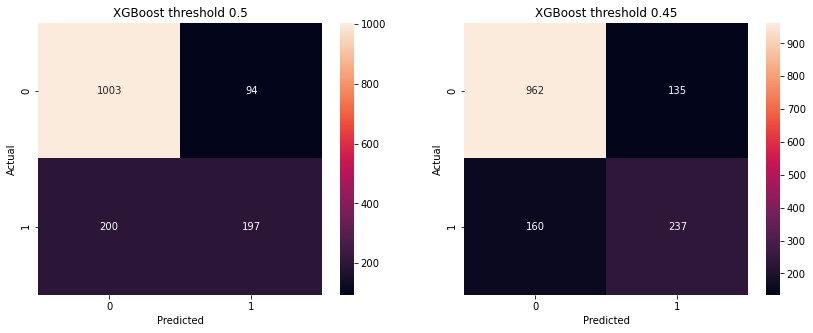

In [196]:
conf_m_xgb_50,  conf_m_xgb_45 = confusion_matrix_table(y_test, [pred_xgb_50, pred_xgb_45], 'XGBoost')

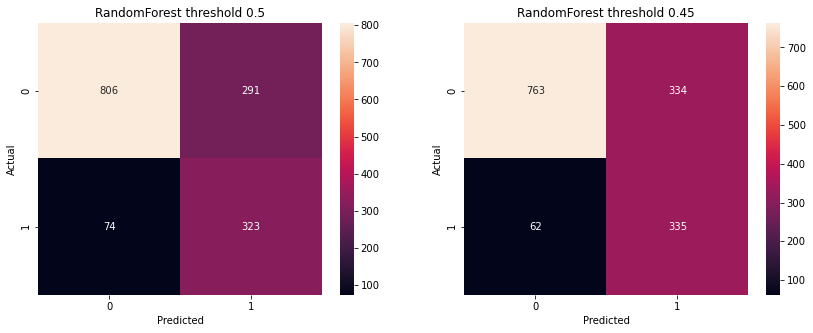

In [197]:
conf_m_rfc_50,  conf_m_rfc_45 = confusion_matrix_table(y_test, [pred_rfc_50, pred_rfc_45], 'RandomForest')

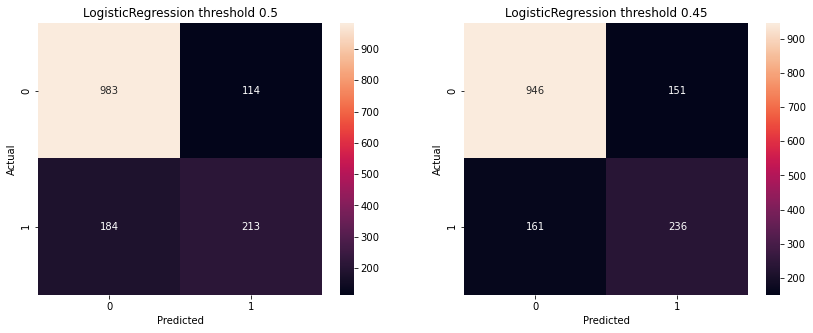

In [198]:
conf_m_lr_50,  conf_m_lr_45 = confusion_matrix_table(y_test, [pred_lr_50, pred_lr_45], 'LogisticRegression')

Как видно из матриц ошибок, смащение порога вероятности до значения 0,45 позволяет улучшить точность определения клиентов, которые покинут компанию, то есть класс "1". Модель на основе RandomForest показывает наибольшее число правильно определенных покидающих клиентов (на 98 и 99 больше по сравнению с XGBClassifier и LogisticRegression соответственно). Однако число правильно предсказанных остающихся клиентов значительно меньше (на 199 и 183 меньше по сравнению с XGBClassifier и LogisticRegression соответственно). Поскольку, если будет неправильно предсказан уход клиента, также будут потрачены лишние средства на его удержание, поэтому необходимо находить компромисс между правильными предсказаниями уходящих и остающихся клиентов. Для RandomForestClassifier имеет место почти одинаковое количество правильно предсказанных уходящих клиентов и ложноположительных предсказаний. Примем это неприемлемым и исключаем модель на основе RandomForest из дальнейшего рассмотрения.  
Что же касается двух оставшихся моделей, то они демонстрируют близкие результаты, в особенности для правильно предсказанных уходов (237 у XGBClassifier и 236 у LogisticRegression), но модель на основе XGBClassifier делает больше правильных предсказаний для остающихся клиентов (.
Таким образом, модель на основе XGBClassifier, обучанная на признаках features_xgb, с порогом вероятности предсказания ухода клиентов в 0.45 является наилучшей моделью прогнозирования оттока клиентов.  
Для повышения качества модели необходимо постоянное обновление базы данных, возможно потребуется введение новых признаков.

In [185]:
962 - 946

16